In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import matplotlib.image as mpimg
import cv2

In [2]:
#Reading the test and train file
train_csv = pd.read_csv(r'C:\Users\ghimi\Downloads\DBR\train.csv')
test_csv = pd.read_csv(r'C:\Users\ghimi\Downloads\DBR\test.csv')

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64


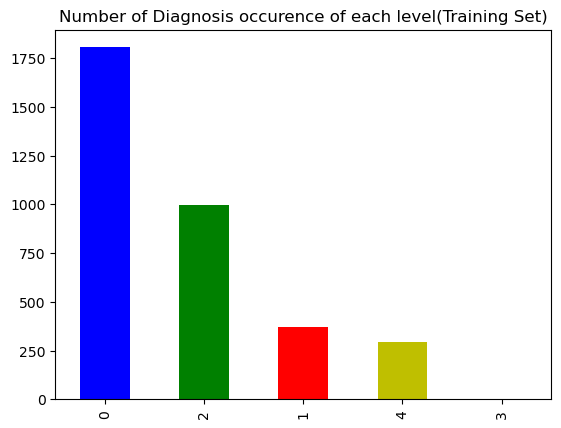

In [3]:
#Let's check the number of diagnosis
plt.title('Number of Diagnosis occurence of each level(Training Set)')
train_csv['diagnosis'].value_counts().plot(kind='bar',color = ['b','g','r','y','w'])
print(train_csv['diagnosis'].value_counts())

#### As we can see, there are more pictures of stage 0 followed up by stage 2 and followed up by stage 1 and stage 4 and stage 3


In [4]:
#Now let's look at some subplots of training images
training_directory = os.listdir(r'C:\Users\ghimi\Downloads\DBR\train_images')

In [5]:
cols = 5
rows = 5
sample_image = []
for i in training_directory:
    images = os.path.join(r'C:\Users\ghimi\Downloads\DBR\train_images\{}'.format(i))
    sample_image.append(images)

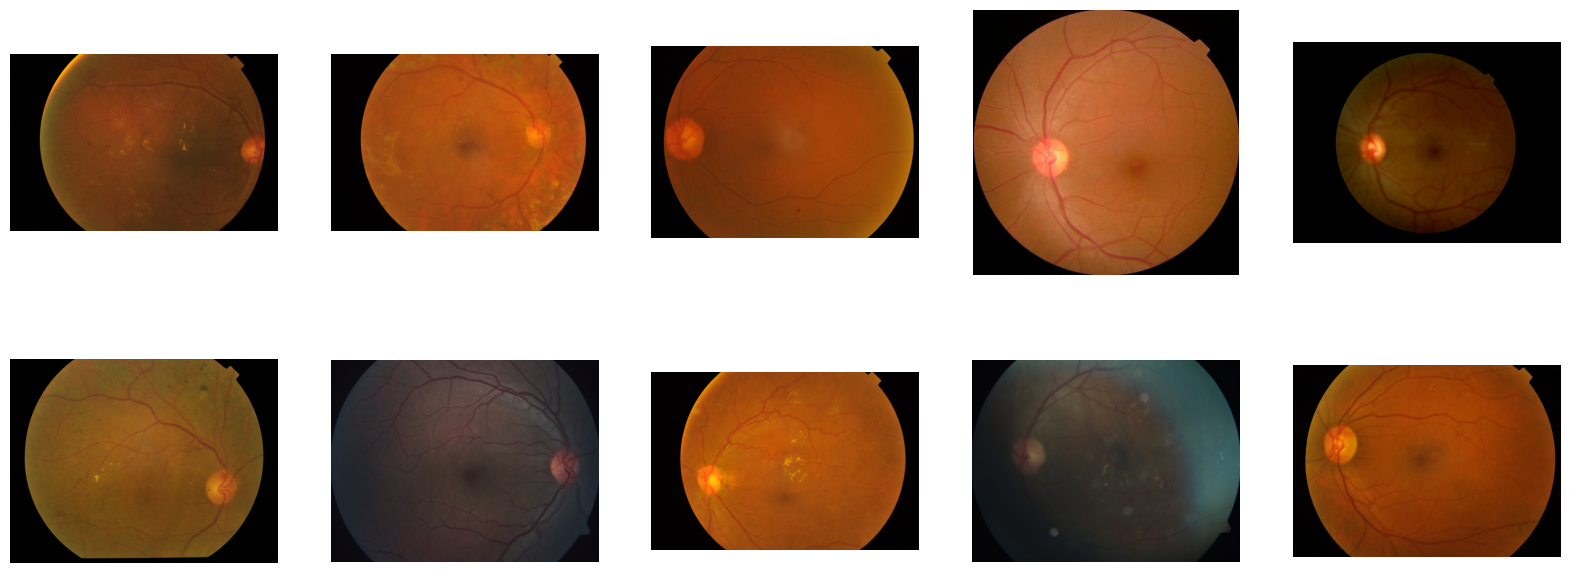

In [6]:
#Coloured images of 10 fundus image
figure = plt.figure(figsize = (20,20))
for i in range(10):
  ax1 = figure.add_subplot(rows,cols,i+1)
  ax1.set_axis_off()
  image = mpimg.imread(sample_image[i])
  plt.imshow(image)

plt.show()

### Understanding the Quality of an Image 

- First we need to convert all the image size into equal size as some of the images quite vary in sizes
- Some of the retinal images are quite darker than other images which can create issue on detecting all the abnormalities on that retinal image

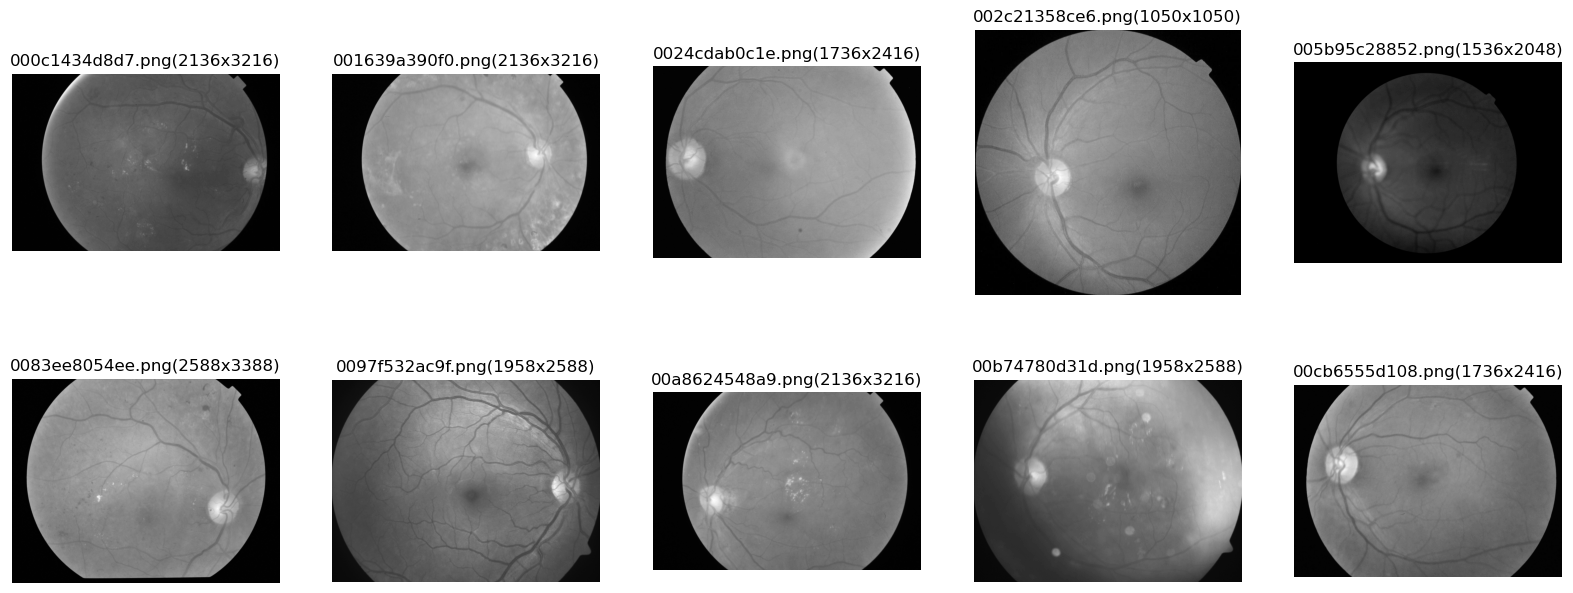

In [7]:
### Let's do the black and white image
#Black and white images of 10 fundus image
figure = plt.figure(figsize = (20,20))
for i in range(10):
  ax1 = figure.add_subplot(rows,cols,i+1)
  ax1.set_axis_off()
  image = cv2.imread(sample_image[i])
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  plt.imshow(image,cmap='gray')
  height,width = image.shape
  ax1.set_title('{}({}x{})'.format(sample_image[i].split('\\')[-1],height,width))

plt.show()

- As we can see, each image has different dimensions so it's crucial to have all the same input dimension
- But to make all the image dimension of same size, we have to lose some pixels so we have to think of an strategic way 

In [8]:
#Before we change the shape, let's run Ben graham's preprocessing technique to see the details
#Let's look at the first image
def single_image_preprocessing(image_directory):
      image = cv2.imread(image_directory)
      image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
      image = cv2.addWeighted(image, 4, cv2.GaussianBlur(image,(0,0), 512/10), -4, 128)
      return image

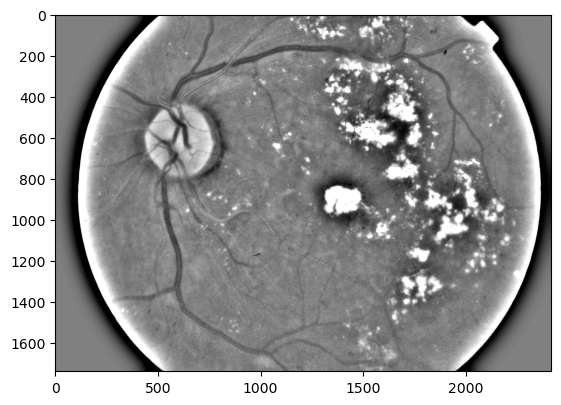

In [14]:
image = single_image_preprocessing(sample_image[13])
plt.imshow(image,cmap = 'gray')